<a href="https://colab.research.google.com/github/maycmesquia/Evolucao_Aprendizado/blob/main/Projeto_Dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [2]:
# Conectanto ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importando Bibliotecas e preparando o ambiente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
# Importando base de dados e criando dataframe
address = '/content/drive/MyDrive/Colab Notebooks/Data Scienc Degree/03 - Modulo: Bibliotecas e APIs/Projeto/'
df_olimpiadas = pd.read_csv(address + 'athlete_events.csv')
df_olimpiadas.drop_duplicates()
df_olimpiadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [ ]:
df_medalhistas_brasileiros = df_olimpiadas.dropna(axis=0, how='any',subset=['Medal'])[df_olimpiadas['NOC']=='BRA']
df_medalhistas_brasileiros.reset_index(inplace=True)
df_medalhistas_brasileiros.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1,1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
2,1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
3,1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
4,1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

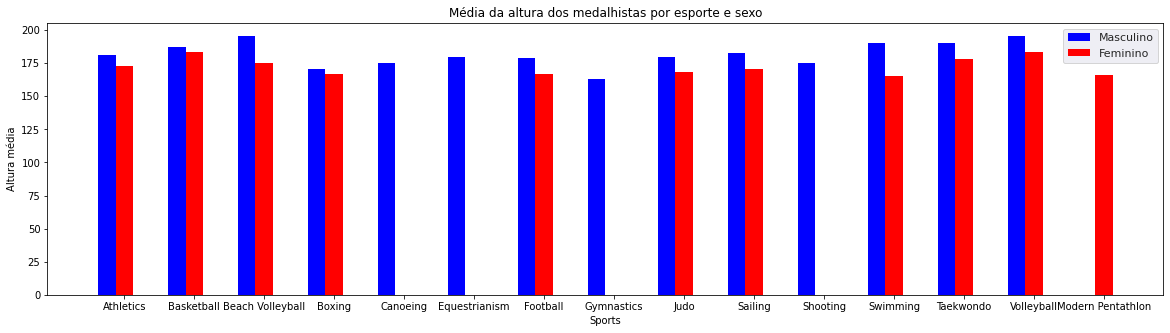

In [ ]:
masculino = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Sex']=='M'].groupby(
                                    by=['Sport'])['Height'].mean().rename('masculino')
                                    
feminino = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Sex']=='F'].groupby(
                                    by=['Sport'])['Height'].mean().rename('feminino')

df_sexo_altura = pd.concat([masculino, feminino], axis=1,names=True)

df_sexo_altura.head(2)

# Grafico
barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(df_sexo_altura['masculino'].size)
r2 = [x + barWidth for x in r1]

plt.bar(r1, df_sexo_altura['masculino'], color='blue', width=barWidth, label='Masculino');
plt.bar(r2, df_sexo_altura['feminino'], color='red' , width=barWidth, label='Feminino');

plt.xlabel('Sports')
plt.xticks([r + barWidth for r in range(df_sexo_altura['masculino'].size)], df_sexo_altura.index)
plt.ylabel('Altura média')
plt.title('Média da altura dos medalhistas por esporte e sexo')

sns.set()
plt.legend()
plt.show()

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

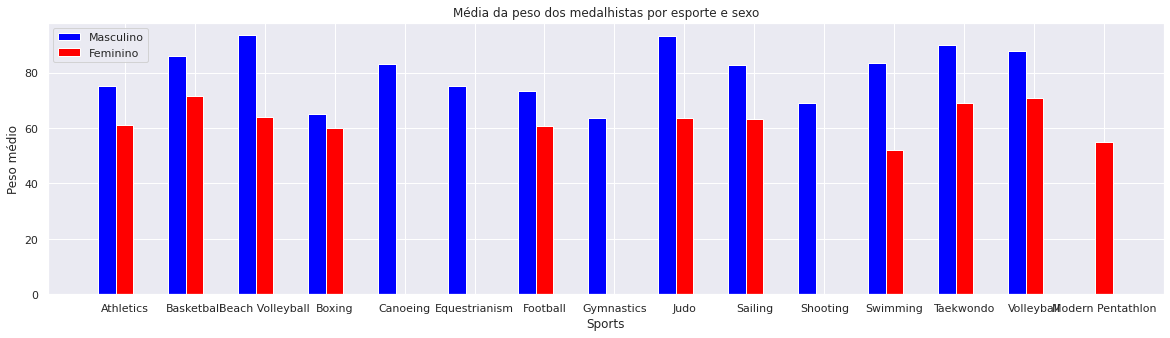

In [ ]:
masculino = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Sex']=='M'].groupby(
                                    by=['Sport'])['Weight'].mean().rename('masculino')
                                    
feminino = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Sex']=='F'].groupby(
                                    by=['Sport'])['Weight'].mean().rename('feminino')

df_sexo_peso = pd.concat([masculino, feminino], axis=1,names=True)

df_sexo_peso.head(2)

barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(df_sexo_peso['masculino'].size)
r2 = [x + barWidth for x in r1]

plt.bar(r1, df_sexo_peso['masculino'], color='blue', width=barWidth, label='Masculino');
plt.bar(r2, df_sexo_peso['feminino'], color='red' , width=barWidth, label='Feminino' );

plt.xlabel('Sports')
plt.xticks([r + barWidth for r in range(df_sexo_peso['masculino'].size)], df_sexo_peso.index)
plt.ylabel('Peso médio')
plt.title('Média da peso dos medalhistas por esporte e sexo')

sns.set()
plt.legend()
plt.show()

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



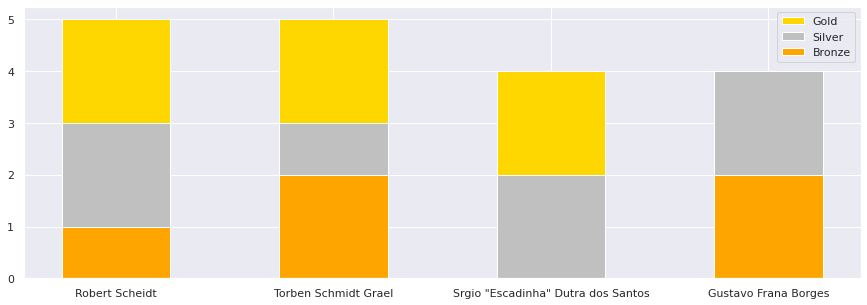

In [ ]:
gold_series = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Medal']=='Gold'].groupby(by=['Name']).count()['Medal'].rename('Gold')
silver_series = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Medal']=='Silver'].groupby(by=['Name']).count()['Medal'].rename('Silver')
bronze_series = df_medalhistas_brasileiros[df_medalhistas_brasileiros['Medal']=='Bronze'].groupby(by=['Name']).count()['Medal'].rename('Bronze')

df_atletas = pd.concat([gold_series, silver_series, bronze_series], axis=1, names=True)
df_atletas.fillna(0, inplace=True)
df_atletas['(S + B)'] = df_atletas['Bronze']+df_atletas['Silver']
df_atletas['(G + S + B)'] = df_atletas['(S + B)']+df_atletas['Gold']

df_maiores_atletas = df_atletas[df_atletas['(G + S + B)']>3]

df_maiores_atletas.sort_values(by='(G + S + B)',ascending=False, inplace=True)

plt.figure(figsize=(15,5))

plt.bar(df_maiores_atletas.index, df_maiores_atletas['(G + S + B)'], color=['gold'], label='Gold',width=0.5);
plt.bar(df_maiores_atletas.index, df_maiores_atletas['(S + B)'], color=['silver'], label='Silver',width=0.5);
plt.bar(df_maiores_atletas.index, df_maiores_atletas['Bronze'], color=['orange'], label='Bronze',width=0.5);

sns.set()
plt.legend();

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

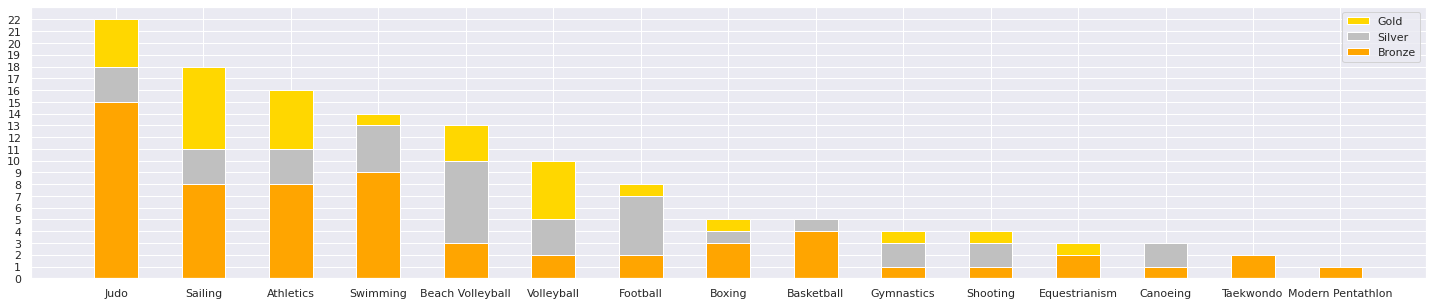

In [ ]:
df_eventos = df_medalhistas_brasileiros.drop_duplicates(subset=['Year','Event', 'Medal'])
gold_series = df_eventos[df_eventos['Medal']=='Gold'].groupby(by=['Sport']).count()['Medal'].rename('Gold')
silver_series = df_eventos[df_eventos['Medal']=='Silver'].groupby(by=['Sport']).count()['Medal'].rename('Silver')
bronze_series = df_eventos[df_eventos['Medal']=='Bronze'].groupby(by=['Sport']).count()['Medal'].rename('Bronze')

df_esportes = pd.concat([gold_series, silver_series, bronze_series], axis=1, names=True)
df_esportes.fillna(0, inplace=True)
df_esportes['(S + B)'] = df_esportes['Bronze']+df_esportes['Silver']
df_esportes['(G + S + B)'] = df_esportes['(S + B)']+df_esportes['Gold']

df_esportes.sort_values(by='(G + S + B)',ascending=False, inplace=True)

plt.figure(figsize=(25,5))

plt.bar(df_esportes.index, df_esportes['(G + S + B)'], color=['gold'], label='Gold',width=0.5);
plt.bar(df_esportes.index, df_esportes['(S + B)'], color=['silver'], label='Silver',width=0.5);
plt.bar(df_esportes.index, df_esportes['Bronze'], color=['orange'], label='Bronze',width=0.5, );

plt.yticks(np.arange(df_esportes['(G + S + B)'].max()+1))

sns.set()
plt.legend();

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

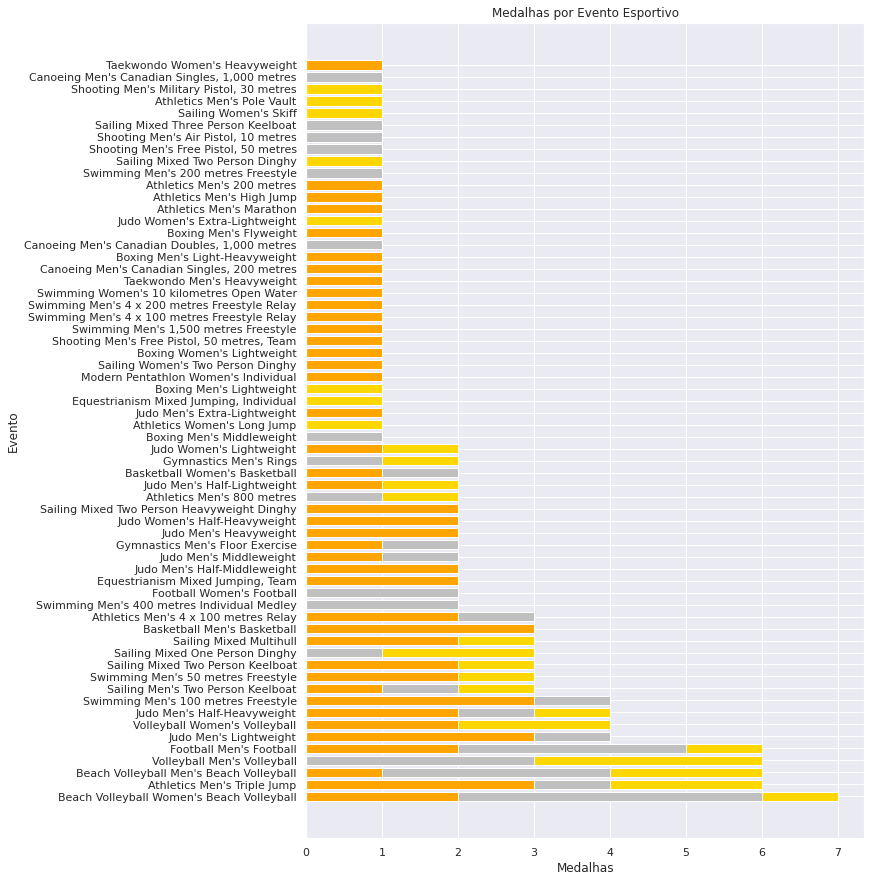

In [ ]:
df_eventos = df_medalhistas_brasileiros.drop_duplicates(subset=['Year','Event', 'Medal'])
gold_series = df_eventos[df_eventos['Medal']=='Gold'].groupby(by=['Event']).count()['Medal'].rename('Gold')
silver_series = df_eventos[df_eventos['Medal']=='Silver'].groupby(by=['Event']).count()['Medal'].rename('Silver')
bronze_series = df_eventos[df_eventos['Medal']=='Bronze'].groupby(by=['Event']).count()['Medal'].rename('Bronze')

df_esportes = pd.concat([gold_series, silver_series, bronze_series], axis=1, names=True)
df_esportes.fillna(0, inplace=True)
df_esportes['(S + B)'] = df_esportes['Bronze']+df_esportes['Silver']
df_esportes['(G + S + B)'] = df_esportes['(S + B)']+df_esportes['Gold']

df_esportes.sort_values(by='(G + S + B)',ascending=False, inplace=True)

plt.figure(figsize=(10,15))

# Dados para cada subplot
plt.barh(df_esportes.index, df_esportes['(G + S + B)'], color=['gold'], label='Gold');
plt.barh(df_esportes.index, df_esportes['(S + B)'], color=['silver'], label='Silver');
plt.barh(df_esportes.index, df_esportes['Bronze'], color=['orange'], label='Bronze');

plt.title("Medalhas por Evento Esportivo");
plt.xlabel("Medalhas"); 
plt.ylabel("Evento");


plt.show()

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

No handles with labels found to put in legend.


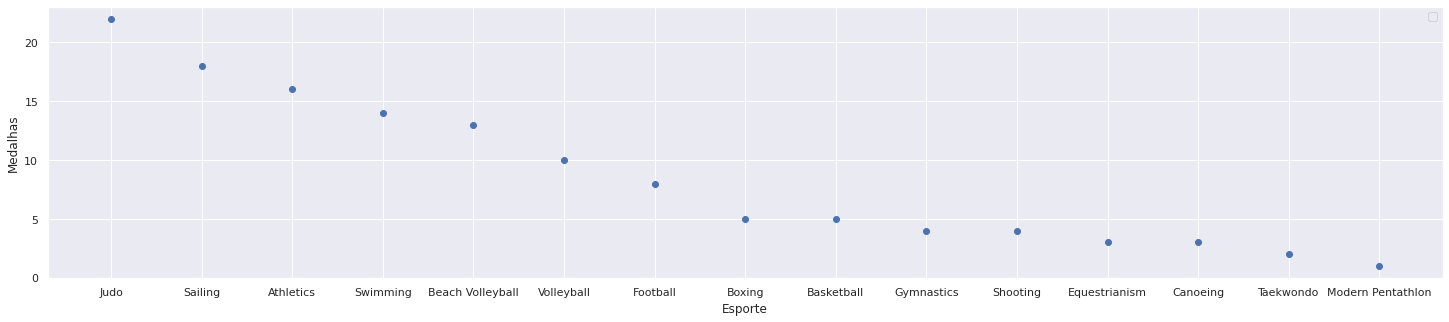

In [ ]:
df_eventos = df_medalhistas_brasileiros.drop_duplicates(subset=['Year','Event', 'Medal'])
gold_series = df_eventos[df_eventos['Medal']=='Gold'].groupby(by=['Sport']).count()['Medal'].rename('Gold')
silver_series = df_eventos[df_eventos['Medal']=='Silver'].groupby(by=['Sport']).count()['Medal'].rename('Silver')
bronze_series = df_eventos[df_eventos['Medal']=='Bronze'].groupby(by=['Sport']).count()['Medal'].rename('Bronze')

df_esportes = pd.concat([gold_series, silver_series, bronze_series], axis=1, names=True)
df_esportes.fillna(0, inplace=True)
df_esportes['(S + B)'] = df_esportes['Bronze']+df_esportes['Silver']
df_esportes['(G + S + B)'] = df_esportes['(S + B)']+df_esportes['Gold']

df_esportes.sort_values(by='(G + S + B)',ascending=False, inplace=True)

plt.figure(figsize=(25,5))

plt.scatter(x=df_esportes.index, y=df_esportes['(G + S + B)']);

plt.xlabel('Esporte');
plt.ylabel('Medalhas');

sns.set()
plt.legend();

Repita o procedimento acima, mas com medalhas de ouro.

No handles with labels found to put in legend.


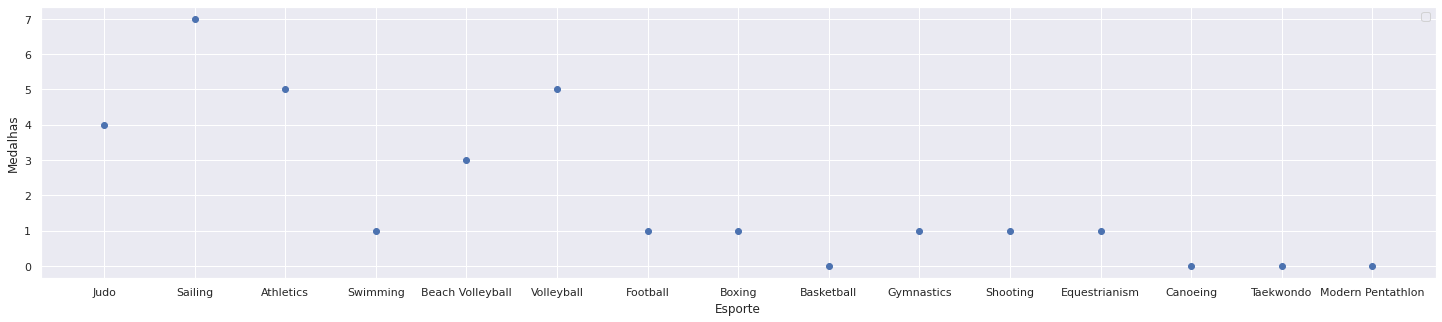

In [ ]:
plt.figure(figsize=(25,5))

plt.scatter(x=df_esportes.index, y=df_esportes['Gold']);

plt.xlabel('Esporte');
plt.ylabel('Medalhas');

sns.set()
plt.legend();

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

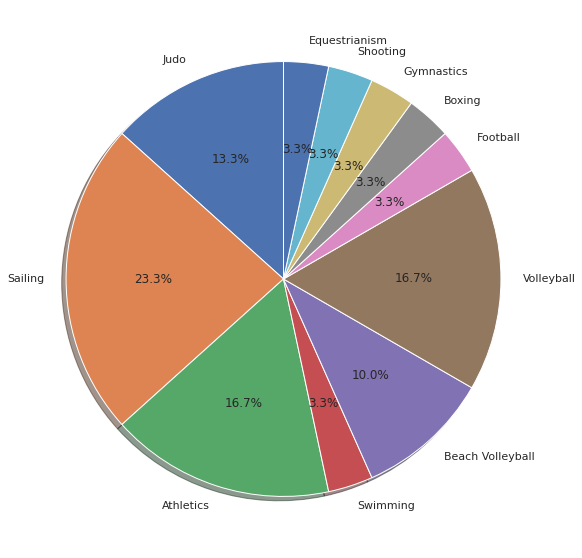

In [ ]:
plt.figure(figsize=(25,10))

plt.pie(df_esportes[df_esportes['Gold']>0]['Gold'], 
        labels=df_esportes[df_esportes['Gold']>0].index, 
        autopct='%1.1f%%',
        shadow=True, startangle=90);

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

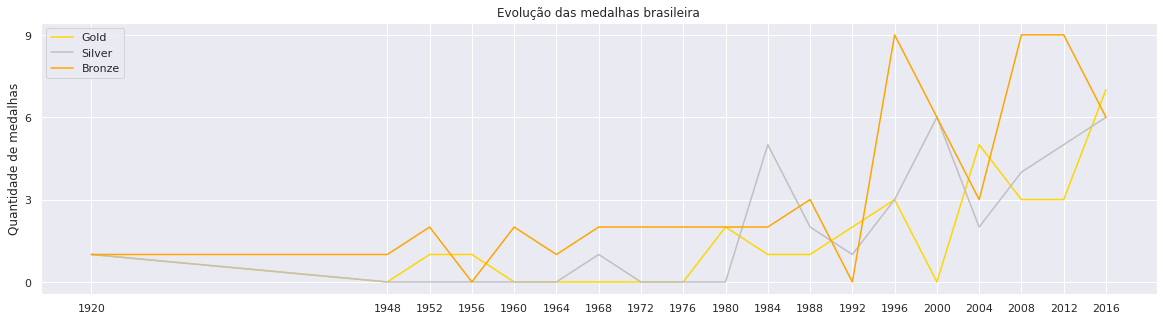

In [ ]:
df_eventos = df_medalhistas_brasileiros.drop_duplicates(subset=['Year','Event', 'Medal'])
gold_series = df_eventos[df_eventos['Medal']=='Gold'].groupby(by=['Year']).count()['Medal'].rename('Gold')
silver_series = df_eventos[df_eventos['Medal']=='Silver'].groupby(by=['Year']).count()['Medal'].rename('Silver')
bronze_series = df_eventos[df_eventos['Medal']=='Bronze'].groupby(by=['Year']).count()['Medal'].rename('Bronze')

df_eventos = pd.concat([gold_series, silver_series, bronze_series], axis=1, names=True)
df_eventos.fillna(0, inplace=True)

df_eventos['Gold Ac'] = df_eventos['Gold'].cumsum()
df_eventos['Silver Ac'] = df_eventos['Silver'].cumsum()
df_eventos['Bronze Ac'] = df_eventos['Bronze'].cumsum()

plt.figure(figsize=(20,5))

plt.plot(df_eventos['Gold'], label='Gold', color='gold', );
plt.plot(df_eventos['Silver'], label='Silver', color='silver');
plt.plot(df_eventos['Bronze'], label='Bronze', color='orange');

plt.title('Evolução das medalhas brasileira', loc='center');
plt.ylabel('Quantidade de medalhas');
plt.legend();
plt.yticks(np.arange(max([df_eventos['Gold'].max(),df_eventos['Silver'].max(),df_eventos['Bronze'].max()])+1))
plt.xticks(df_eventos.index);

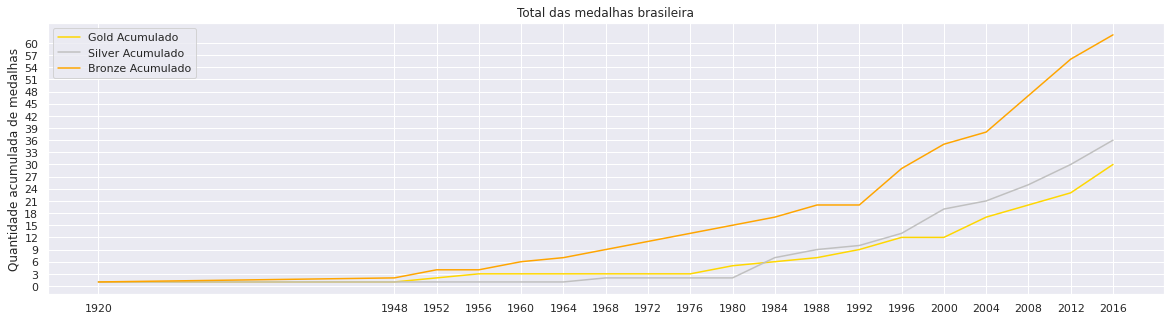

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(df_eventos['Gold Ac'], label='Gold Acumulado', color='gold', );
plt.plot(df_eventos['Silver Ac'], label='Silver Acumulado', color='silver');
plt.plot(df_eventos['Bronze Ac'], label='Bronze Acumulado', color='orange');

plt.title('Total das medalhas brasileira', loc='center');
plt.ylabel('Quantidade acumulada de medalhas');
plt.legend();
plt.yticks(np.arange(max([df_eventos['Gold Ac'].max(),df_eventos['Silver Ac'].max(),df_eventos['Bronze Ac'].max()])+1, step=3))
plt.xticks(df_eventos.index);

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [9]:
df_medalhistas_olimpicos = df_olimpiadas[df_olimpiadas['Season']=='Summer']
df_medalhistas_olimpicos.dropna(axis=0, subset=['Medal'], inplace=True)
df_medalhistas_olimpicos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

In [32]:
base_series = df_medalhistas_olimpicos.groupby(by='Name')['Medal'].count()
min = atletas_series.min()
q1 = atletas_series.quantile(0.25)
mediana = atletas_series.median()
media = atletas_series.mean()
q2 = atletas_series.quantile(0.5)
q3 = atletas_series.quantile(0.75)
max = atletas_series.max()
iqr = q3 - q1
out_i = q1 - (1.5 * iqr)
out_s = q3 + (1.5 * iqr)

print(f" Minimo: {min} \n 1º Quartil: {q1} \n Mediana: {mediana} \n 2º Quartil: {q2} \n Média: {media} \n 3º Quartil: {q3} \n Máximo: {max}")
print(f" IQR: {iqr} \n Outiliers: \n    valor superior a: {out_s} \n    valor inferior a: {out_i}")

 Minimo: 1 
 1º Quartil: 1.0 
 Mediana: 1.0 
 2º Quartil: 1.0 
 Média: 1.3887960888164597 
 3º Quartil: 1.0 
 Máximo: 28
 IQR: 0.0 
 Outiliers: 
    valor superior a: 1.0 
    valor inferior a: 1.0


Text(0.5, 1.0, 'boxplot de medalhas com todos atletas')

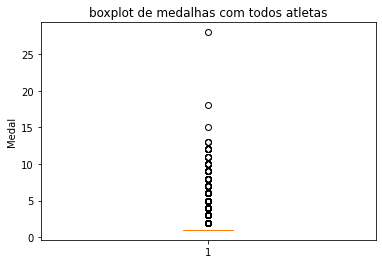

In [33]:
plt.boxplot(x=df_medalhistas_olimpicos.groupby(by='Name')['Medal'].count());
plt.ylabel('Medal');
plt.title('boxplot de medalhas com todos atletas')

Text(0.5, 1.0, 'boxplot de medalhas sem outiliers')

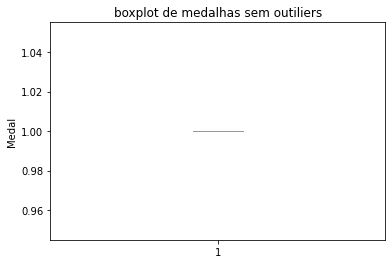

In [37]:
df_outiliers_off = df_medalhistas_olimpicos.groupby(by='Name')['Medal'].count()
df_outiliers_off = df_outiliers_off[df_outiliers_off<=1]

plt.boxplot(x=df_outiliers_off);
plt.ylabel('Medal');
plt.title('boxplot de medalhas sem outiliers')

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.